# Lista 2
### NCG-040 - Introdução à Visão Computacional

**Instruções:**

 1. Comentários nos códigos desenvolvidos.
 1. Caso exista uma pergunta, deve ser respondida como comentários no arquivo ou em uma nova célula de texto.
 1. Digitar seu nome e DRE abaixo.
 1. Ao finalizarem a lista, renomeie ou salve uma cópia do arquivo no formato NomeSobrenome_ListaX.ipynb
 1. Enviar via Dropbox até 10/08/2021 - https://www.dropbox.com/request/BHSy3XhiLxmLF1tq45a7

`Nome: ` Mayara Azevedo Aragão

`DRE: ` 115060969

### 0) Setup

Para esta lista, vamos usar o Numpy, PyPlot, OpenCV e Random. Use a célula abaixo para importar as bibliotecas.

In [ ]:
import cv2, random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Abaixo, uma função pronta para adicionar ruído do tipo salt & pepper. Você irá precisar dela na questão 2.

In [ ]:
def sp_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

### 1) Suavização de Imagens (Blur)

A suavização de imagens (Blurring) é útil na remoção de ruídos e diminuição de detalhes de uma imagem para facilitar o processamento de sistemas de Visão Computacional

a) Na célula abaixo, há um código que cria um retângulo "oco", execute a célula;

b) Na célula em branco, crie uma cópia do retângulo para cada tipo de blur com a respectiva função do OpenCV aplicada para:

b1) Média, b2) Mediana e b3) Gaussiana com ksize = 15;

c) Plote os resultados

Dica: Use plt.subplot para visualizar todos os resultados lado a lado, sem precisar de novas células.


In [ ]:
retangulo = np.zeros((200,200), np.uint8)
cv2.rectangle(retangulo, (40,40), (160,160), 255, -2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

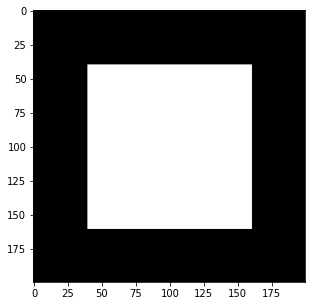

In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

display_img(retangulo)

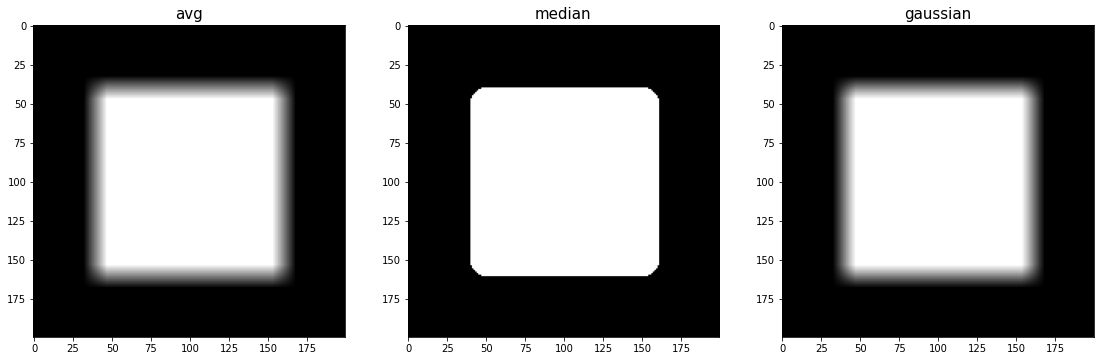

In [ ]:
# b1) Média
bluravg = cv2.blur(retangulo, ksize=(15,15))

# b2) Mediana
blurmedian = cv2.medianBlur(retangulo,ksize=15)

# b3)Gaussiana com ksize=15
blurgaussian = cv2.GaussianBlur(retangulo, (15,15),10)

fig,axes = plt.subplots(1,3,figsize=(19,19))
lista = ["bluravg","blurmedian","blurgaussian"]
for (ax,blur) in zip(axes.ravel(),lista):
  ax.imshow(eval(blur),cmap='gray')
  ax.set_title(blur.replace("blur",""),{'fontsize':15})


### 2) Thresholding

O thresholding, ou binarização ou limiarização é um processo de segmentação de imagens que se baseia na diferença dos níveis de cinza que compõe diferentes objetos de uma imagem. A partir de um limiar (threshold) estabelecido de acordo com as características dos objetos que se quer isolar, a imagem pode ser segmentada em dois grupos: o grupo de pixels com níveis de cinza abaixo do limiar e o grupo de pixels com níveis de cinza acima do limiar. Em uma imagem limiarizada, atribui-se um valor fixo para todos os pixels de mesmo grupo. 

a) Crie uma cópia do retângulo, chamada retangulo_ruidoso, para tal, use a função sp_noise criada anteriormente, atribua um valor de 0.05 como parâmetro.

b) Experimente combinações de Blur e Thresholding para limpar a imagem de ruídos

c) Plote os resultados

d) Comente os resultados

Boa sorte!

In [ ]:
retangulo_ruidoso = sp_noise(retangulo,0.05)

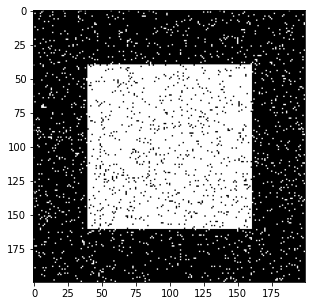

In [ ]:
display_img(retangulo_ruidoso)

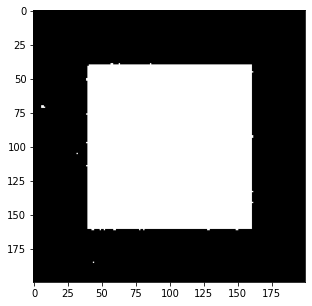

In [ ]:
# Gaussiana

retangulo_ruidoso_gauss = cv2.GaussianBlur(retangulo_ruidoso,ksize=(15,15),sigmaX=1)
req, threshold_gaussian = cv2.threshold(retangulo_ruidoso_gauss,retangulo_ruidoso_gauss.std(),255,cv2.THRESH_BINARY)
display_img(threshold_gaussian)

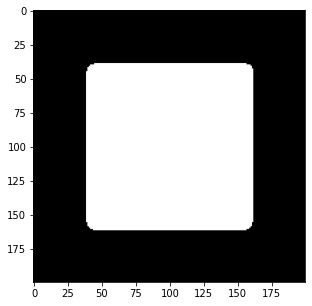

In [ ]:
retangulo_ruidoso_gauss = cv2.GaussianBlur(retangulo_ruidoso,ksize=(19,19),sigmaX=4)
req, threshold_gaussian = cv2.threshold(retangulo_ruidoso_gauss,retangulo_ruidoso_gauss.std(),255,cv2.THRESH_BINARY)
display_img(threshold_gaussian)


# Obtive um resultado satisfatório utilizando a Gaussiana com ksize=19 e sigma=4, contudo a retangulo ficou arredondado.

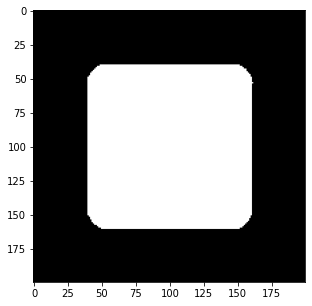

In [ ]:
#Mediana

retangulo_ruidoso_mediana = cv2.medianBlur(retangulo_ruidoso,21)
x, threshold_mediana = cv2.threshold(retangulo_ruidoso_mediana ,np.median(retangulo_ruidoso_mediana ),255,cv2.THRESH_BINARY)
display_img(threshold_mediana)

# Obtive o melhor resultado com esta técnica utilizando Median Blur com ksize=21

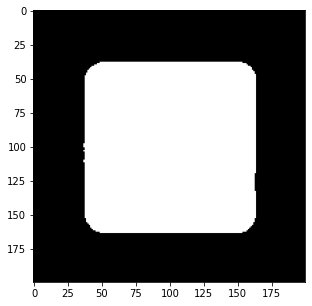

In [ ]:
#Media

retangulo_ruidoso_avg = cv2.blur(retangulo_ruidoso,(18,18))
x, threshold_avg = cv2.threshold( retangulo_ruidoso_avg ,retangulo_ruidoso_avg.mean(),255,cv2.THRESH_BINARY)
display_img(threshold_avg)

# Obtive o melhor resultado com esta técnica utilizando Average Blur com ksize=18, contudo os resultados foram piores em comparação com as combinações acima.